In [85]:
import json
import matplotlib.pyplot as plt
import itertools

In [133]:
file_combinations = [(i,j) for (i,j) in itertools.product([0,1,2], repeat=2)]

In [134]:
files = { (i,j): open(f"./data/acl_-{i}_{j}.json") for (i,j) in file_combinations }
datas = {(i,j): json.load(files[(i,j)]) for (i,j) in files } 
[ len(datas[x]["E"]) for x in datas]

[33207, 31929, 31474, 31929, 31474, 31211, 31474, 31211, 31086]

In [172]:
len(set([ (x["u"], x["v"]) for x in datas[(0,0)]["E"]])), len(datas[(0,0)]["E"])

(30797, 33207)

In [135]:
def ccdf(values):
    from itertools import groupby
    x = []
    y = []
    values = sorted(values)
    
    # First make dist
    dist = [(key, len(list(group))) for key, group in groupby(values)]
    
    # Then compute inverse cumulative
    total = 1.0
    for (val, count) in dist:
        x.append(val)
        y.append(total)
        total -= count/len(values)
    return x, y

Distribution of link durations, i.e. of $\{e-b : (b,e,u,v)\in E\}$

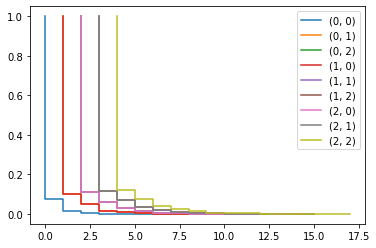

In [160]:
durations = {(i,j): [x["e"] - x["b"] for x in datas[(i,j)]["E"] ] for (i,j) in datas }
durations_ccdf = {x: ccdf(durations[x]) for x in durations}

for (i,j) in durations_ccdf:
    x, y = durations_ccdf[(i,j)]
    plt.plot(x, y, drawstyle='steps-pre')

plt.legend(datas.keys())
plt.show()

We correct the bias in this distribution; for each parameter pair (i,j), then all links trivially last at least i+j; we remove this duration to see if larger (i,j) really lead to significant aggregation.

In other words; this is the distribution of $\{(e-b-(i+j):(b,e, uv)\in E \}$, with $i,j$ the aggregation parameters taken from the file name.

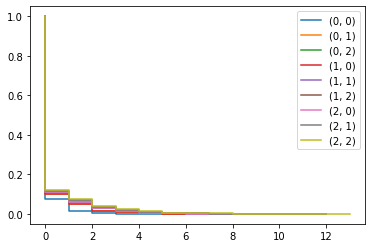

In [170]:
durations = {(i,j): [x["e"] - x["b"] - (i + j) for x in datas[(i,j)]["E"] ] for (i,j) in datas }
durations_ccdf = {x: ccdf(durations[x]) for x in durations}

for (i,j) in durations_ccdf:
    x, y = durations_ccdf[(i,j)]
    plt.plot(x, y, drawstyle='steps-pre')
plt.legend(datas.keys())
plt.show()

Distribution of the number of tags per node $u\in V$

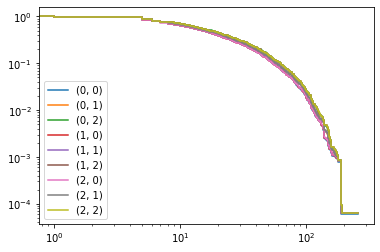

In [173]:
tags = {(i,j): [len(set(x["label_u"])) for x in datas[(i,j)]["E"] ] for (i,j) in datas }
tags_ccdf = {x: ccdf(tags[x]) for x in tags}

for (i,j) in tags_ccdf:
    x, y = tags_ccdf[(i,j)]
    plt.loglog(x, y, drawstyle='steps-pre')
plt.legend(datas.keys())
plt.show()

Distribution of the number of $(b,e,u,v)$ links for each pair $(u,v)\in V\otimes V$

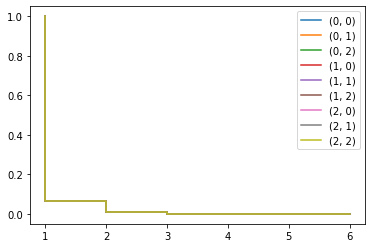

In [162]:
# links (temporal) per (u,v)
links = {(i,j): [(x["u"], x["v"]) for x in datas[(0,0)]["E"] ] for (i,j) in datas }
occurrences = {(i,j): [len(list(group)) for key, group in itertools.groupby(links[(i,j)])] for (i,j) in datas }
occurrences_ccdf = {x: ccdf(occurrences[x]) for x in occurrences}
for (i,j) in occurrences_ccdf:
    x, y = occurrences_ccdf[(i,j)]
    plt.plot(x, y, drawstyle='steps-pre')
plt.legend(datas.keys())
plt.show()

Distribution of the number of $(b,e,u,v)$ links for each node $u$

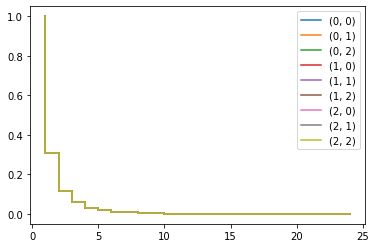

In [166]:
# links (temporal) per u
links = {(i,j): [x["u"] for x in datas[(0,0)]["E"] ] + [x["v"] for x in datas[(0,0)]["E"] ] for (i,j) in datas }
occurrences = {(i,j): [len(list(group)) for key, group in itertools.groupby(links[(i,j)])] for (i,j) in datas }
occurrences_ccdf = {x: ccdf(occurrences[x]) for x in occurrences}
for (i,j) in occurrences_ccdf:
    x, y = occurrences_ccdf[(i,j)]
    plt.plot(x, y, drawstyle='steps-pre')
plt.legend(datas.keys())
plt.show()

Graphe de concepts plutot que d'auteurs ?

(données DBLP restreint aux abstracts?)